In [51]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [52]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [53]:
NUM_CLASSES = 4

# 学習データ読み込み

In [54]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [55]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [58]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,114 (4.35 KB)

 Trainable params: 1,114 (4.35 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [60]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [47]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
19/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2860 - loss: 1.4482
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2937 - loss: 1.4336 - val_accuracy: 0.4204 - val_loss: 1.3034
Epoch 2/1000
19/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3964 - loss: 1.2889 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3977 - loss: 1.2798 - val_accuracy: 0.5680 - val_loss: 1.1789
Epoch 3/1000
18/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4313 - loss: 1.2076 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4397 - loss: 1.1940 - val_accuracy: 0.6409 - val_loss: 1.0670
Epoch 4/1000
20/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4767 - loss: 1.1201 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [48]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9417 - loss: 0.2450 


In [49]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [50]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[0.8116126  0.09184989 0.05241374 0.04412381]
0


# 混同行列

In [62]:
%pip install pandas seaborn matplotlib


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


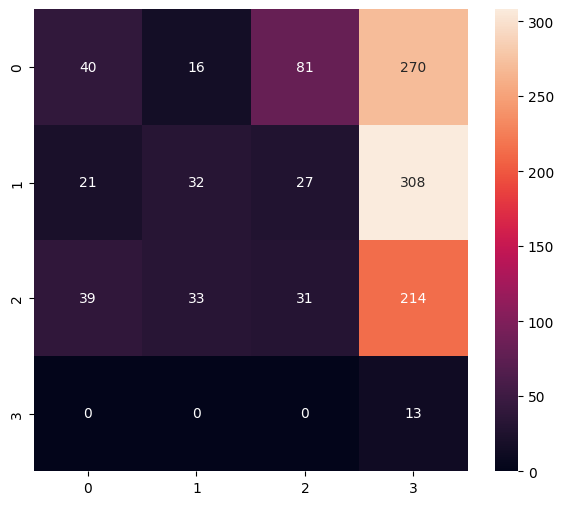

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.10      0.16       407
           1       0.40      0.08      0.14       388
           2       0.22      0.10      0.14       317
           3       0.02      1.00      0.03        13

    accuracy                           0.10      1125
   macro avg       0.26      0.32      0.12      1125
weighted avg       0.34      0.10      0.14      1125



In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [64]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [65]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ketan\AppData\Local\Temp\tmpqonigphz\assets


INFO:tensorflow:Assets written to: C:\Users\ketan\AppData\Local\Temp\tmpqonigphz\assets


Saved artifact at 'C:\Users\ketan\AppData\Local\Temp\tmpqonigphz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor_54')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2865884699856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2865884698320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2865884698512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2865884696784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2865884698704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2865884700624: TensorSpec(shape=(), dtype=tf.resource, name=None)


6072

# 推論テスト

In [66]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

d:\python_pro\hand-gesture-recognition-using-mediapipe-main\.venv\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [67]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [68]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [69]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 15.6 ms
Wall time: 7.47 ms


In [70]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.21177374 0.23035762 0.2444782  0.31339046]
3
